# Read In Dataset 😚

In [162]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [163]:
data = pd.read_csv('/home/robot/Desktop/SoftRice/LASharedBikeAnalysis-main/Final_Large_data.csv')

In [164]:
data.head(1)

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,bike_type,Starting Lat-Long,Ending Lat-Long,start station name,end station name
0,165226338,19,2021-07-01T00:12:00,2021-07-01T00:31:00,4548,34.026829,-118.393517,4555,34.005871,-118.429161,20122,30,One Way,Monthly Pass,standard,"{'longitude': -118.393517, 'latitude': 34.026829}","{'longitude': -118.429161, 'latitude': 34.005871}",NaN,NaN


In [165]:
data.shape

(58411, 19)

---

# Select Necessary Columns to Analyze 😁

### Process Station Infomation 😦

In [166]:
station_info = data[['Starting Station ID','Starting Station Latitude','Starting Station Longitude','Ending Station ID','Ending Station Latitude','Ending Station Longitude']]
station_info.head()

,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude
0,4548,34.026829,-118.393517,4555,34.005871,-118.429161
1,4441,34.026619,-118.281807,4441,34.026619,-118.281807
2,4555,34.005871,-118.429161,4555,34.005871,-118.429161
3,4441,34.026619,-118.281807,4454,34.017899,-118.291718
4,4564,34.035351,-118.434143,4561,34.020061,-118.422684


In [167]:
start_station = station_info[['Starting Station ID','Starting Station Longitude','Starting Station Latitude']]
#start_station.head()

In [168]:
end_station = station_info[['Ending Station ID','Ending Station Longitude','Ending Station Latitude']]
#end_station.head()

### Process Bike Infomation 😄

In [237]:
bike_info = data[['Duration','Start Time','End Time','Trip Route Category','Plan Duration','Passholder Type']]
bike_info.head()

,Duration,Start Time,End Time,Trip Route Category,Plan Duration,Passholder Type
0,19,2021-07-01T00:12:00,2021-07-01T00:31:00,One Way,30,Monthly Pass
1,22,2021-07-01T00:23:00,2021-07-01T00:45:00,Round Trip,30,Monthly Pass
2,26,2021-07-01T00:34:00,2021-07-01T01:00:00,Round Trip,30,Monthly Pass
3,17,2021-07-01T00:50:00,2021-07-01T01:07:00,One Way,30,Monthly Pass
4,15,2021-07-01T02:38:00,2021-07-01T02:53:00,One Way,30,Monthly Pass


In [170]:
data['Passholder Type'].value_counts()

Passholder Type
Monthly Pass    25423
Walk-up         19830
One Day Pass     7081
Annual Pass      6076
Testing             1
Name: count, dtype: int64

### Process Trip Information 😃

In [171]:
trip_info = data[['Duration','Start Time','End Time','Starting Station ID','Ending Station ID','Trip Route Category','Plan Duration','Passholder Type']]
trip_info.head()

,Duration,Start Time,End Time,Starting Station ID,Ending Station ID,Trip Route Category,Plan Duration,Passholder Type
0,19,2021-07-01T00:12:00,2021-07-01T00:31:00,4548,4555,One Way,30,Monthly Pass
1,22,2021-07-01T00:23:00,2021-07-01T00:45:00,4441,4441,Round Trip,30,Monthly Pass
2,26,2021-07-01T00:34:00,2021-07-01T01:00:00,4555,4555,Round Trip,30,Monthly Pass
3,17,2021-07-01T00:50:00,2021-07-01T01:07:00,4441,4454,One Way,30,Monthly Pass
4,15,2021-07-01T02:38:00,2021-07-01T02:53:00,4564,4561,One Way,30,Monthly Pass


---

## Station Infomation 😮

In [172]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [173]:
start_station.head().dropna()

,Starting Station ID,Starting Station Longitude,Starting Station Latitude
0,4548,-118.393517,34.026829
1,4441,-118.281807,34.026619
2,4555,-118.429161,34.005871
3,4441,-118.281807,34.026619
4,4564,-118.434143,34.035351


In [174]:
grouped = start_station.groupby('Starting Station ID')

In [175]:
count_value = start_station['Starting Station ID'].value_counts().values

In [176]:
st_info = grouped.max()
st_info.insert(2,'Counts',count_value)

In [177]:
st_info.head()

,Starting Station Longitude,Starting Station Latitude,Counts
Starting Station ID,,,
3000,-118.238220,34.025890,3279
3005,-118.258537,34.048500,2485
3006,-118.256668,34.045540,2410
3007,-118.254593,34.050480,2022
3008,-118.262733,34.046612,1634


---

## Discover Bike Infomation

In [178]:
bike_info.head()

,Duration,Start Time,End Time,Trip Route Category,Plan Duration,Passholder Type
0,19,2021-07-01T00:12:00,2021-07-01T00:31:00,One Way,30,Monthly Pass
1,22,2021-07-01T00:23:00,2021-07-01T00:45:00,Round Trip,30,Monthly Pass
2,26,2021-07-01T00:34:00,2021-07-01T01:00:00,Round Trip,30,Monthly Pass
3,17,2021-07-01T00:50:00,2021-07-01T01:07:00,One Way,30,Monthly Pass
4,15,2021-07-01T02:38:00,2021-07-01T02:53:00,One Way,30,Monthly Pass


In [179]:
bike_info['Trip Route Category'].unique()

array(['One Way', 'Round Trip'], dtype=object)

In [238]:
bike_info['Passholder Type'].unique()

array(['Monthly Pass', 'Walk-up', 'Annual Pass', 'One Day Pass',
       'Testing'], dtype=object)

In [181]:
bike_info['Plan Duration'].unique()

array([ 30,   1, 365, 999])

In [182]:
bike_info.describe()

,Duration,Plan Duration
count,58411.000000,58411.000000
mean,45.731455,52.412799
std,135.685078,108.874373
min,1.000000,1.000000
25%,9.000000,1.000000
50%,18.000000,30.000000
75%,35.000000,30.000000
max,1440.000000,999.000000


---

# Methodology 😜

- **Distribution of Hot Stations**
- **Rush Hour Analysis**
- **Round Trip/One Way Comparison Analysis**
- **relevancy analysis between Duration&Passholder Type**

---

# Data Analysis 😁

### 1）**Distribution of Hot Stations**

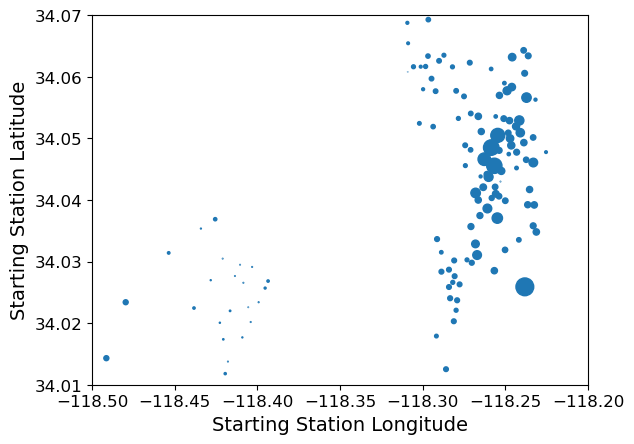

In [236]:
pic = st_info.plot(kind="scatter", x="Starting Station Longitude", y="Starting Station Latitude",s = st_info['Counts']/20,
                        alpha=1)
plt.axis([-118.50,-118.20,34.01,34.07])
plt.show()

### Conclusion

- If there is a **L.A. map** should be better to analysis...

---

## 2）**Rush Hour Analysis**

### *Use Regular Expression to Extract the Time*

In [184]:
bike_info = bike_info.dropna()

In [185]:
import re
from pandas import Series,DataFrame

pattern_time = '[0-9][0-9]:[0-9][0-9]:[0-9][0-9]'
pattern_hour = '[0-9][0-9]'

In [186]:
timelist = []
for item in bike_info['Start Time']:
    found_times = re.findall(pattern_time, item)
    if found_times:  # Check if the list is not empty
        timelist.append(found_times[0])
    else:
        # Handle the case where no time is found
        # You could append a default value or continue
        # For example:
        timelist.append("No time found")
        # or simply continue to the next iteration
        # continue


In [187]:
timelist[:5]

['00:12:00', '00:23:00', '00:34:00', '00:50:00', '02:38:00']

### *Extract the Hour*

In [188]:
hourlist = []
for item in timelist:
    hour = re.findall(pattern_hour,item)[0]
    hourlist.append(hour)

In [189]:
hourlist[:5]

['00', '00', '00', '00', '02']

In [190]:
timeSeries = Series(timelist)
hourSeries = Series(hourlist)

In [191]:
bike_info.head()

,Duration,Start Time,End Time,Trip Route Category,Plan Duration,Passholder Type
0,19,2021-07-01T00:12:00,2021-07-01T00:31:00,One Way,30,Monthly Pass
1,22,2021-07-01T00:23:00,2021-07-01T00:45:00,Round Trip,30,Monthly Pass
2,26,2021-07-01T00:34:00,2021-07-01T01:00:00,Round Trip,30,Monthly Pass
3,17,2021-07-01T00:50:00,2021-07-01T01:07:00,One Way,30,Monthly Pass
4,15,2021-07-01T02:38:00,2021-07-01T02:53:00,One Way,30,Monthly Pass


In [192]:
bike_info.insert(3,'Start Hour',hourSeries)

In [193]:
bike_info.head()

,Duration,Start Time,End Time,Start Hour,Trip Route Category,Plan Duration,Passholder Type
0,19,2021-07-01T00:12:00,2021-07-01T00:31:00,00,One Way,30,Monthly Pass
1,22,2021-07-01T00:23:00,2021-07-01T00:45:00,00,Round Trip,30,Monthly Pass
2,26,2021-07-01T00:34:00,2021-07-01T01:00:00,00,Round Trip,30,Monthly Pass
3,17,2021-07-01T00:50:00,2021-07-01T01:07:00,00,One Way,30,Monthly Pass
4,15,2021-07-01T02:38:00,2021-07-01T02:53:00,02,One Way,30,Monthly Pass


In [194]:
Start_Hour_counts = bike_info['Start Hour'].value_counts().sort_index()

In [195]:

from pyecharts.charts import Line
from pyecharts import options as opts

# # Use your data
# x_data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
# y_data = [1771, 1337, 864, 445, 417, 559, 1735, 4684, 6805, 6210, 5356, 7546, 9920, 9628, 8356, 8231, 9863, 11606, 10347, 7876, 5946, 4845, 3799, 2757]
attr = list(map(int, Start_Hour_counts.index))
print(attr)
v = Start_Hour_counts.values.tolist()
print(v)
# Create a line chart
line = Line(init_opts=opts.InitOpts(width='1000px', height='400px'))
line.add_xaxis(attr)
line.add_yaxis("", v, markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_='max'), opts.MarkPointItem(type_='min')]))
line.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
line.set_global_opts(title_opts=opts.TitleOpts(title='Rush Hour Analysis'))

# Save the chart to an HTML file
line.render('rush-hour-line.html')


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[586, 297, 233, 155, 142, 148, 484, 1221, 1844, 2460, 2802, 3243, 3812, 4268, 4342, 4414, 4711, 5402, 5713, 4424, 3027, 2142, 1613, 928]


'/home/robot/Desktop/SoftRice/LASharedBikeAnalysis-main/Process_data/rush-hour-line.html'

### Conclusion

- Shared-bike riders usually choose to start their trip at **7a.m.-23p.m.**
- **7a.m.-10a.m.**morning peak period, **10a.m.-13a.m.**afternoon peak period and **16a.m.-18a.m.**evening peak period shows significant increase in shared-bike use
- The peak of use is **18p.m.**, which is presumed to be **the evening peak**
- The lowest point of use is **4a.m**,few shared-bikes are used in mid-night
- From the peak to the lowest point is a **complete downward trend**, with the vehicle gradually reduced

---


## 3）**Relevancy Analysis Between Duration&Passholder Type**

In [196]:
bike_trip_info = bike_info[['Duration','Trip Route Category','Plan Duration','Passholder Type']]
bike_trip_info.head()

,Duration,Trip Route Category,Plan Duration,Passholder Type
0,19,One Way,30,Monthly Pass
1,22,Round Trip,30,Monthly Pass
2,26,Round Trip,30,Monthly Pass
3,17,One Way,30,Monthly Pass
4,15,One Way,30,Monthly Pass


### *Cluster by Duration*

In [197]:
duration = bike_trip_info[['Duration']]
duration.head()

,Duration
0,19
1,22
2,26
3,17
4,15


In [198]:
from sklearn.cluster import KMeans 
k=4 
kmodel = KMeans(n_clusters=k)
kmodel.fit(duration)

KMeans(n_clusters=4)

In [239]:
kmodel.cluster_centers_

array([[  21.05876792],
       [1357.48583878],
       [ 144.60272805],
       [ 684.34224599]])

In [200]:

c = pd.DataFrame(kmodel.cluster_centers_).sort_values(0)
c['Duration Class'] = ['short-time','medium-time','long-time','very-long-time']
c.columns=['Duration','Duration Class']
c

,Duration,Duration Class
0,21.058768,short-time
2,144.602728,medium-time
3,684.342246,long-time
1,1357.485839,very-long-time


In [201]:
short = c[c['Duration Class']=='short-time'].index[0]
medium = c[c['Duration Class']=='medium-time'].index[0]
long = c[c['Duration Class']=='long-time'].index[0]
verylong = c[c['Duration Class']=='very-long-time'].index[0]

In [202]:

duration_map = {
    short:'short-time',
    medium:'medium-time',
    long:'long-time',
    verylong:'very-long-time'
}

In [203]:
labels = kmodel.labels_


### **Insert the Results Into the** ***Bike_Trip_Info***

In [204]:
bike_trip_info.insert(1,'Duration Class',labels)

In [205]:
bike_trip_info['Duration Class'] = bike_trip_info['Duration Class'].map(duration_map)

In [206]:
bike_trip_info.head()

,Duration,Duration Class,Trip Route Category,Plan Duration,Passholder Type
0,19,short-time,One Way,30,Monthly Pass
1,22,short-time,Round Trip,30,Monthly Pass
2,26,short-time,Round Trip,30,Monthly Pass
3,17,short-time,One Way,30,Monthly Pass
4,15,short-time,One Way,30,Monthly Pass


### *Check the Number of Each Duration*

In [207]:
bike_trip_info['Duration Class'].value_counts()

Duration Class
short-time        52886
medium-time        4692
very-long-time      459
long-time           374
Name: count, dtype: int64

---

### Duration Class Search

#### very-long-time Search

In [208]:
verylong_counts = bike_trip_info[bike_trip_info['Duration Class']=='very-long-time']['Plan Duration'].value_counts()
series1 = verylong_counts/sum(verylong_counts)
series1

Plan Duration
1      0.923747
30     0.065359
365    0.010893
Name: count, dtype: float64

#### long-time Search

In [209]:
long_counts = bike_trip_info[bike_trip_info['Duration Class']=='long-time']['Plan Duration'].value_counts()
series2 = long_counts/sum(long_counts)

#### medium-time Search

In [210]:
medium_counts = bike_trip_info[bike_trip_info['Duration Class']=='medium-time']['Plan Duration'].value_counts()
series3 = medium_counts/sum(medium_counts)

#### short-time Search

In [211]:
short_counts = bike_trip_info[bike_trip_info['Duration Class']=='short-time']['Plan Duration'].value_counts()
series4 = short_counts/sum(short_counts)
series4 = series4.sort_index()

---

### **Radar Chart**

In [212]:
min_length = min(len(series1), len(series2), len(series3), len(series4))
 
series1 = series1[:min_length]
series2 = series2[:min_length]
series3 = series3[:min_length]
series4 = series4[:min_length]

In [213]:
duration_rate = pd.DataFrame(list(zip(series1,series2,series3)))

In [214]:
duration_rate.columns = ['very-long-time','long-time','medium-time']
duration_rate.index = ['0','30','365']

In [215]:
duration_rate = duration_rate[['medium-time','long-time','very-long-time']]
duration_rate.insert(0,'short-time',series4.values)

In [216]:
duration_rate

,short-time,medium-time,long-time,very-long-time
0,0.414458,0.873828,0.860963,0.923747
30,0.469727,0.109335,0.101604,0.065359
365,0.115796,0.016837,0.037433,0.010893


In [217]:
from pyecharts.charts import Radar
from pyecharts import options as opts

schema = [("0", 0.81), ("30", 0.63), ("365", 0.08)]
v1 = [duration_rate['short-time'].values.round(2).tolist()]
v2 = [duration_rate['medium-time'].values.round(2).tolist()]

radar = Radar(init_opts=opts.InitOpts(width='1000px', height='400px'))
radar.add_schema(schema=schema, shape='circle')
radar.add("Short Time", v1)
radar.add("Medium Time", v2)
radar.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
radar.set_global_opts(title_opts=opts.TitleOpts(title='Duration Rate Analysis'))

radar.render('duration-rate-radar.html')


'/home/robot/Desktop/SoftRice/LASharedBikeAnalysis-main/Process_data/duration-rate-radar.html'

### Conclusion

- The **majority** of users who use shared-bikes for a **very-long-time** are those who use them **immediately**.
- **Over 60%** of users who use shared-bikes for a **short-time** are those who possess **Monthly-Pass**.
-  The percentage of those who possess Flex-Pass among **short-time trip** bike users is also the **highest among all types**.

---

## 4）Round Trip/One Way Comparison Analysis

In [218]:
bike_info.head()

,Duration,Start Time,End Time,Start Hour,Trip Route Category,Plan Duration,Passholder Type
0,19,2021-07-01T00:12:00,2021-07-01T00:31:00,00,One Way,30,Monthly Pass
1,22,2021-07-01T00:23:00,2021-07-01T00:45:00,00,Round Trip,30,Monthly Pass
2,26,2021-07-01T00:34:00,2021-07-01T01:00:00,00,Round Trip,30,Monthly Pass
3,17,2021-07-01T00:50:00,2021-07-01T01:07:00,00,One Way,30,Monthly Pass
4,15,2021-07-01T02:38:00,2021-07-01T02:53:00,02,One Way,30,Monthly Pass


### **Divide the 'Round Trip'&'One Way'**

In [219]:
one_way_trip = bike_info[bike_info['Trip Route Category']=='One Way']
round_trip = bike_info[bike_info['Trip Route Category']=='Round Trip']

In [220]:
one_way_trip.head()

,Duration,Start Time,End Time,Start Hour,Trip Route Category,Plan Duration,Passholder Type
0,19,2021-07-01T00:12:00,2021-07-01T00:31:00,00,One Way,30,Monthly Pass
3,17,2021-07-01T00:50:00,2021-07-01T01:07:00,00,One Way,30,Monthly Pass
4,15,2021-07-01T02:38:00,2021-07-01T02:53:00,02,One Way,30,Monthly Pass
5,10,2021-07-01T03:25:00,2021-07-01T03:35:00,03,One Way,1,Walk-up
6,16,2021-07-01T03:51:00,2021-07-01T04:07:00,03,One Way,30,Monthly Pass


In [221]:
round_trip.head()

,Duration,Start Time,End Time,Start Hour,Trip Route Category,Plan Duration,Passholder Type
1,22,2021-07-01T00:23:00,2021-07-01T00:45:00,00,Round Trip,30,Monthly Pass
2,26,2021-07-01T00:34:00,2021-07-01T01:00:00,00,Round Trip,30,Monthly Pass
23,23,2021-07-01T07:50:00,2021-07-01T08:13:00,07,Round Trip,30,Monthly Pass
25,23,2021-07-01T07:52:00,2021-07-01T08:15:00,07,Round Trip,1,One Day Pass
33,72,2021-07-01T08:22:00,2021-07-01T09:34:00,08,Round Trip,1,One Day Pass


### Analyze 'One Way' and 'Round Starting' Time

In [222]:
one_way_hour = one_way_trip['Start Hour'].value_counts().sort_index()
round_hour = round_trip['Start Hour'].value_counts().sort_index()

In [223]:
from pyecharts.charts import Line
from pyecharts import options as opts

x1 = list(map(int, one_way_hour.index))
y1 = one_way_hour.values.tolist()

x2 = list(map(int, round_hour.index))
y2 = round_hour.values.tolist()

line = Line(init_opts=opts.InitOpts(width='1000px', height='400px'))
line.add_xaxis(x1)
line.add_yaxis("one way", y1, markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_='max')]))
line.add_yaxis("round", y2, markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_='max')]))
line.set_global_opts(title_opts=opts.TitleOpts(title='One-way/round-trip departure time analysis'))

line.render('departure_time_analysis.html')


'/home/robot/Desktop/SoftRice/LASharedBikeAnalysis-main/Process_data/departure_time_analysis.html'

### Analyze the proportion of different membership card holders in One Way and Round

In [224]:
oneway_rate = one_way_trip['Passholder Type'].value_counts()/sum(one_way_trip['Passholder Type'].value_counts())
#oneway_rate

In [225]:
round_rate = round_trip['Passholder Type'].value_counts()/sum(round_trip['Passholder Type'].value_counts())

In [226]:
from pyecharts.charts import Pie
from pyecharts import options as opts

attr1 = oneway_rate.index.tolist()
v1 = oneway_rate.values.tolist()

pie1 = Pie(init_opts=opts.InitOpts(width='1000px', height='400px'))
pie1.add("", [list(z) for z in zip(attr1, v1)], radius=["30%", "75%"])
pie1.set_global_opts(title_opts=opts.TitleOpts(title="One Way"))
pie1.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))

pie1.render('One-way-pie.html')


'/home/robot/Desktop/SoftRice/LASharedBikeAnalysis-main/Process_data/One-way-pie.html'

In [227]:
from pyecharts.charts import Pie
from pyecharts import options as opts

attr2 = round_rate.index.tolist()
v2 = round_rate.values.tolist()

pie2 = Pie(init_opts=opts.InitOpts(width='1000px', height='400px'))
pie2.add("", [list(z) for z in zip(attr2, v2)], radius=["30%", "75%"])
pie2.set_global_opts(title_opts=opts.TitleOpts(title="Round"))
pie2.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))

pie2.render('Round-pie.html')


'/home/robot/Desktop/SoftRice/LASharedBikeAnalysis-main/Process_data/Round-pie.html'

### Conclusion

- The proportion of users with membership cards for One Way Trip's shared bicycles is **very high**, accounting for over 70%. Most of them are **monthly card holders**.
- The majority of **Round Trip's** shared bicycle users are casual users, with only **thirty percent** having membership cards, and most of these members are also **monthly card holders**."

---

### 分析One Way与Round与共享单车使用时长的关系

In [228]:
duration_cate_info = bike_info[['Duration','Trip Route Category']]
duration_cate_info.head()

,Duration,Trip Route Category
0,19,One Way
1,22,Round Trip
2,26,Round Trip
3,17,One Way
4,15,One Way


In [229]:
one_way_duration = duration_cate_info[duration_cate_info['Trip Route Category']=='One Way']
#one_way_duration
round_duration = duration_cate_info[duration_cate_info['Trip Route Category']=='Round Trip']

In [230]:
tmp_frame1 = one_way_duration.describe()
tmp_frame2 = round_duration.describe()
tmp_frame1.columns = ['One Way']
tmp_frame2.columns = ['Round']

Output Describe Information

In [231]:
tmp_frame1.join(tmp_frame2) #collapse frame

,One Way,Round
count,45631.000000,12780.000000
mean,39.475839,68.067136
std,136.662651,129.701820
min,1.000000,1.000000
25%,8.000000,18.000000
50%,15.000000,35.000000
75%,27.000000,75.000000
max,1440.000000,1440.000000


### Conclusion

- Based on the **mean**, **median**, and **upper and lower quartiles** in the table above, it is evident that the duration of use for **Round Trip** bicycles is generally longer than that of **One Way Trip** bicycles, which is consistent with expectations.

---